In [3]:
import os
import librosa
import torch
import torchaudio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Config
DATASET_PATH = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres"
SAMPLE_RATE = 22050
N_MFCC = 13

# Torchaudio MFCC extractor
mfcc_transform = torchaudio.transforms.MFCC(
    sample_rate=SAMPLE_RATE,
    n_mfcc=N_MFCC,
    melkwargs={"n_fft": 2048, "hop_length": 512, "n_mels": 40}
)

# Load and process
features, labels = [], []
skipped = 0

for genre in os.listdir(DATASET_PATH):
    genre_path = os.path.join(DATASET_PATH, genre)
    if not os.path.isdir(genre_path):
        continue
    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            try:
                y, sr = librosa.load(file_path, sr=SAMPLE_RATE, mono=True)
                waveform = torch.tensor(y).unsqueeze(0)  # shape: (1, samples)
                mfcc = mfcc_transform(waveform)
                mfcc_mean = mfcc.mean(dim=2).squeeze().numpy()
                features.append(mfcc_mean)
                labels.append(genre)
            except Exception as e:
                skipped += 1
                print(f"[Skipped] {file_path}: {e}")

print(f"\n✅ Extracted {len(features)} samples, Skipped: {skipped}")

# Prepare dataset
X = np.array(features)
le = LabelEncoder()
y = le.fit_transform(labels)
y_cat = to_categorical(y)  # For TensorFlow softmax

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)

# Build TensorFlow model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y)), activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n🎯 Test Accuracy: {accuracy:.4f}")



[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00037.wav: cannot reshape tensor of 0 elements into shape [-1, 0] because the unspecified dimension size -1 can be any value and is ambiguous
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00039.wav: cannot reshape tensor of 0 elements into shape [-1, 0] because the unspecified dimension size -1 can be any value and is ambiguous
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00040.wav: cannot reshape tensor of 0 elements into shape [-1, 0] because the unspecified dimension size -1 can be any value and is ambiguous
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00041.wav: cannot reshape tensor of 0 elements into shape [-1, 0] because the uns

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Assuming you added this after the above block
y = le.fit_transform(labels)
X_train, X_test, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_rf)

y_pred_rf = clf.predict(X_test_rf)


NameError: name 'X_test_rf' is not defined

In [5]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Decode labels if needed
y_true = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Generate and plot confusion matrix
cm = confusion_matrix(y_true, y_pred_labels, labels=le.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(xticks_rotation=90, ax=ax, cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()


ValueError: y should be a 1d array, got an array of shape (468, 47) instead.

In [7]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances (MFCCs)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xlabel("MFCC Coefficients")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


NameError: name 'clf' is not defined

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=le.classes_))


NameError: name 'y_pred' is not defined

[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00037.wav: Empty audio
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00039.wav: Empty audio
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00040.wav: Empty audio
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00041.wav: Empty audio
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00043.wav: Empty audio
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.00044.wav: Empty audio
[Skipped] C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres\MaChaabi\chaabi.0

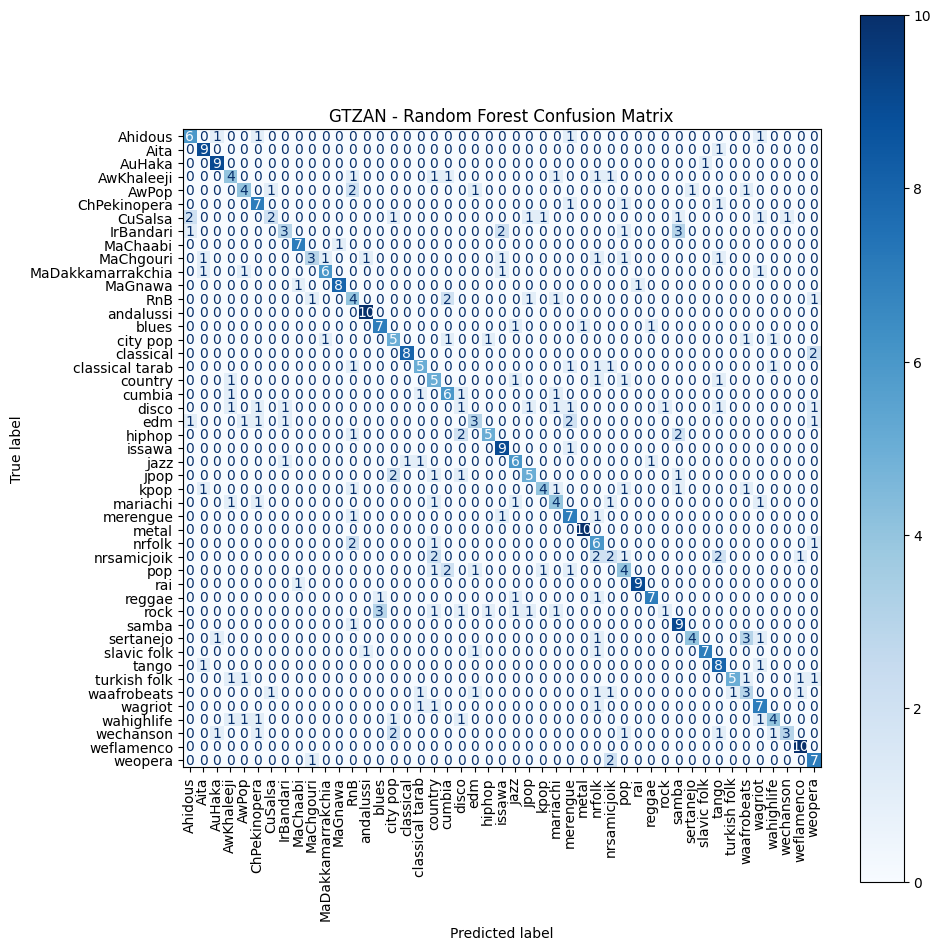

In [17]:
import os
import numpy as np
import torch
import torchaudio
import librosa
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 🔧 Configuration
GTZAN_PATH = "C:/Users/RIHAB-PC/OneDrive - Al Akhawayn University in Ifrane/Global_Music_Genre_Dataset1/Genres" 
SAMPLE_RATE = 22050
N_MFCC = 13

# MFCC extractor
mfcc_transform = torchaudio.transforms.MFCC(
    sample_rate=SAMPLE_RATE,
    n_mfcc=N_MFCC,
    melkwargs={"n_fft": 2048, "hop_length": 512, "n_mels": 40}
)

features= []
labels = []
skipped = 0

# 🔄 Feature extraction loop
for genre in os.listdir(GTZAN_PATH):
    genre_path = os.path.join(GTZAN_PATH, genre)
    if not os.path.isdir(genre_path):
        continue
    for file in os.listdir(genre_path):
        if file.endswith(".wav"):
            file_path = os.path.join(genre_path, file)
            try:
                y, sr = librosa.load(file_path, sr=SAMPLE_RATE, mono=True)
                if len(y) == 0:
                    raise ValueError("Empty audio")

                waveform = torch.tensor(y).unsqueeze(0)
                mfcc = mfcc_transform(waveform)
                mfcc_mean = mfcc.mean(dim=2).squeeze().numpy()
                features.append(mfcc_mean)
                labels.append(genre)
            except Exception as e:
                skipped += 1
                print(f"[Skipped] {file_path}: {e}")

print(f"\n✅ Extracted {len(features)} samples, Skipped: {skipped} files")

# 🧠 Prepare dataset
X = np.array(features)
le = LabelEncoder()
y = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 🌲 Train Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 🎯 Predict and Evaluate
y_pred = clf.predict(X_test)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 🔍 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
plt.title("GTZAN - Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()


In [21]:
# 🎯 Predict and Evaluate
y_pred = clf.predict(X_test)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))


📊 Classification Report:

                   precision    recall  f1-score   support

          Ahidous       0.60      0.60      0.60        10
             Aita       0.69      0.90      0.78        10
           AuHaka       0.75      0.90      0.82        10
       AwKhaleeji       0.40      0.40      0.40        10
            AwPop       0.50      0.40      0.44        10
     ChPekinopera       0.54      0.70      0.61        10
          CuSalsa       0.50      0.20      0.29        10
        IrBandari       0.50      0.30      0.38        10
         MaChaabi       0.78      0.88      0.82         8
        MaChgouri       0.60      0.30      0.40        10
MaDakkamarrakchia       0.75      0.60      0.67        10
          MaGnawa       0.89      0.80      0.84        10
              RnB       0.29      0.40      0.33        10
        andalussi       0.83      1.00      0.91        10
            blues       0.64      0.70      0.67        10
         city pop       0.45

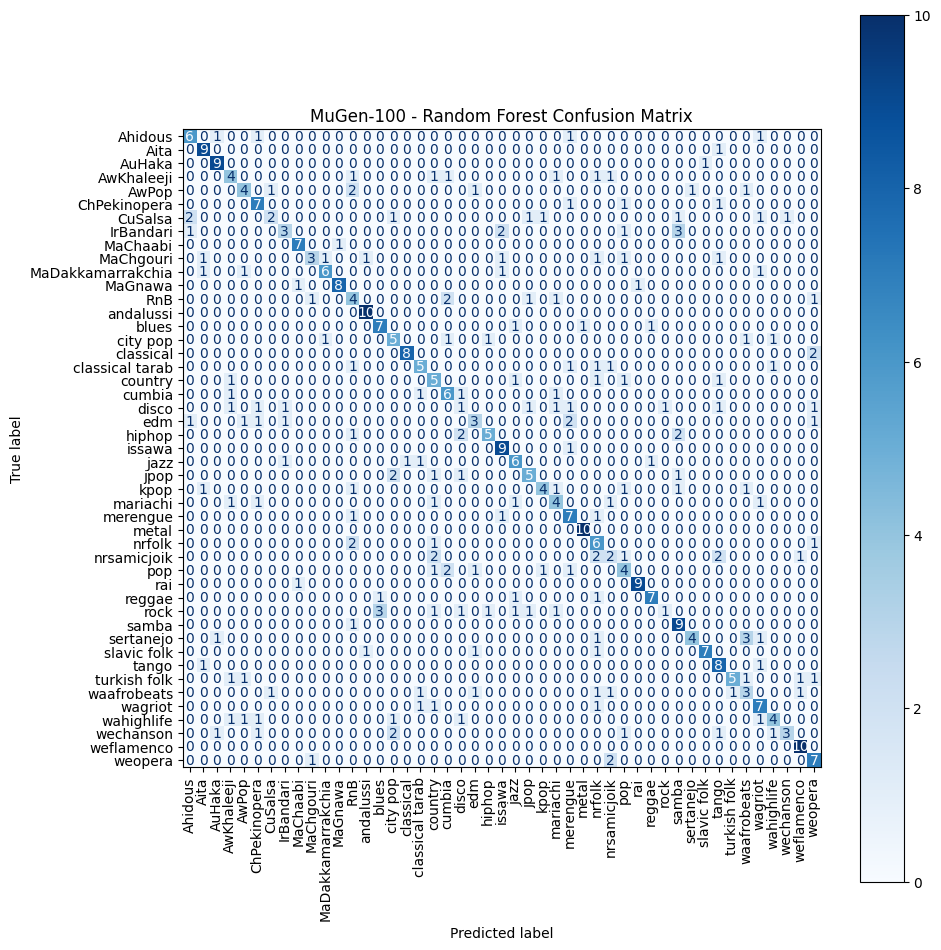

In [23]:
# 🔍 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90)
plt.title("MuGen-100 - Random Forest Confusion Matrix")
plt.tight_layout()
plt.show()